# ASTR:1771 Blackbody Radiation

### Plot Planck function over a range of wavelengths at three temperatures 

Planck function formula:
- $I_\lambda = B_\lambda(T) \equiv \frac{2 hc^2}{\lambda^5}\frac{1}{e^{\frac{hc/\lambda}{kT}}-1}$

Useful links:
- [astropy units](https://docs.astropy.org/en/stable/units/standard_units.html)
- [astropy constants](https://docs.astropy.org/en/stable/constants/index.html)
- [numpy math functions](https://numpy.org/doc/stable/reference/routines.math.html)

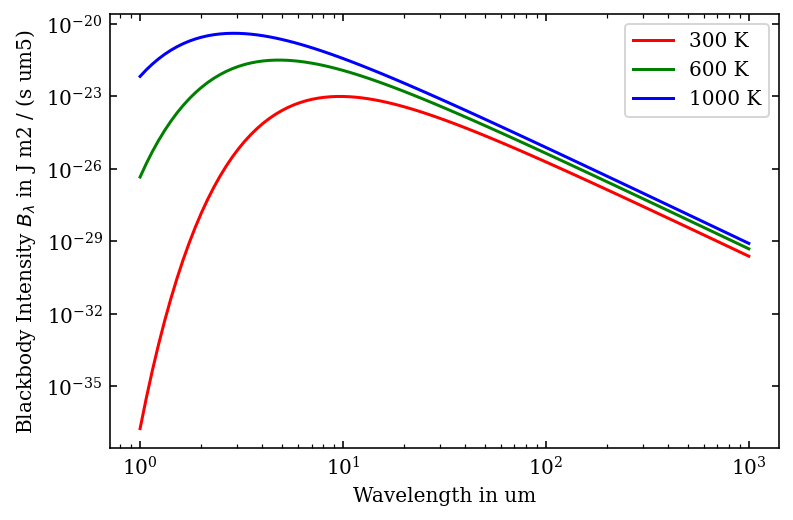

In [1]:
# load essential modules - numpy for scientific calculation and astropy's constants
import numpy as np
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt

# function to calculate B_lambda(T)
def planck(lam,T):
    # lam - wavelengths, T - temperature 
    # all input parameters should be quantities (value + unit)
    pl_part = 2.0 * const.h * (const.c ** 2)/(lam ** 5)
    exppart = np.exp(const.h * const.c/(lam * const.k_B * T))-1.0
    return pl_part/exppart

# example: blackbody radiation spectrum for T = 300 K, 600 K, and 1000 K
lam = np.logspace(0.0,3,num=100) * u.um
B_lambda1 = planck(lam, 300.0 * u.K)
B_lambda2 = planck(lam, 600.0 * u.K)
B_lambda3 = planck(lam,1000.0 * u.K)

plt.plot(lam,B_lambda1,'r-',lam,B_lambda2,'g-',lam,B_lambda3,'b-')
plt.yscale('log')
plt.xscale('log')
plt.legend(['300 K', '600 K', '1000 K'])
plt.xlabel('Wavelength in '+str(lam.unit))
plt.ylabel('Blackbody Intensity $B_\lambda$ in '+str(B_lambda1.unit));

### Calculate Equilibrium Temperature of Planets and Asteroids 

Derived formula for equilibrium temperature for fast rotating planets / asteroids:
- $(T_{\rm eq}^{\rm atm})^4 = \frac{L (1-a)}{16\pi \sigma_{\rm SB} d^2} (1+\tau)$
- where $\tau$ is the greenhouse optical depth of the atmosphere, $L$ the luminosity of the central star, $0 < a < 1$ the albedo, $d$ the heliocentric distance.

In [2]:
def Teq(L,a,d,tau):
    T4 = L * (1-a) * (1+tau)/(16. * np.pi * const.sigma_sb * d**2)
    return np.sqrt(np.sqrt(T4))

# example: equilibrium temperature at 1 AU from the Sun for albedo = 0.3, tau = 0.5
Teq1au = Teq(const.L_sun,0.3,const.au,0.5)
print(Teq1au)

281.7456393119763 K


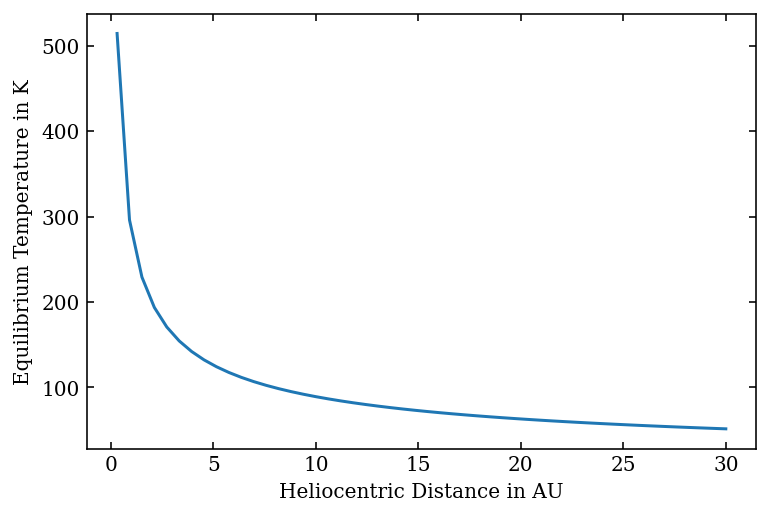

In [3]:
# plot equilibrium temperature vs. heliocentric distance
d = np.linspace(0.3,30) * const.au # 0.3 to 30 AU, from Mercury to Neptune

# calculate equilibrium temperature
alb = 0.3
tau = 0.5
Teqs = Teq(const.L_sun, alb, d, tau)

# convert distance to AU
d = d.to(u.au)

# plot the curve
plt.plot(d,Teqs)
plt.xlabel('Heliocentric Distance in '+str(d.unit))
plt.ylabel('Equilibrium Temperature in '+str(Teqs.unit));